In [60]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

In [61]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ''.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[3]])

decoded_newswire

"?thefarmershomeadministrationtheusagriculturedepartment'sfarmlendingarmcouldloseaboutsevenbilliondlrsinoutstandingprincipalonitsseverely?borrowersoraboutonefourthofitsfarmloanportfoliothegeneralaccountingofficegaosaidinremarkspreparedfordeliverytothesenateagriculturecommitteebriancrowleyseniorassociatedirectorofgaoalsosaidthatapreliminaryanalysisofproposedchangesin?financialeligibilitystandardsindicatedasmanyasonehalfof?borrowerswhoreceivednewloansfromtheagencyin1986wouldbe?undertheproposedsystemtheagencyhasproposedevaluating?creditusingavarietyoffinancialratiosinsteadofrelyingsolelyon?abilitysenateagriculturecommitteechairmanpatrickleahydvt?theproposedeligibilitychangestelling?administrator?clarkatahearingthattheywouldmarkadramaticshiftintheagency'spurposeawayfrombeingfarmers'lenderoflastresorttowardbecomingabigcitybankbutclarkdefendedthenewregulationssayingtheagencyhadaresponsibilityto?its70billiondlrloanportfolioina?yet?mannercrowleyofgao??armsaidtheproposedcredit?systemattemptedto

In [62]:
import numpy as np


def vectorize_sequence(sequences, demention=10000):
    results = np.zeros((len(sequences),demention))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results
    

# 訓練データのベクトル化
x_train = vectorize_sequence(train_data)

# テストデータのベクトル化
x_test = vectorize_sequence(test_data)

In [63]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [64]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [65]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [66]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [67]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=8,
    batch_size=512,
    validation_data=(x_val, y_val)
)


Train on 7982 samples, validate on 1000 samples
Epoch 1/8


 512/7982 [>.............................] - ETA: 5s - loss: 3.8035 - acc: 0.0898

1024/7982 [==>...........................] - ETA: 3s - loss: 3.7253 - acc: 0.2539

1536/7982 [====>.........................] - ETA: 2s - loss: 3.6166 - acc: 0.3040

2048/7982 [======>.......................] - ETA: 1s - loss: 3.5038 - acc: 0.3330

2560/7982 [========>.....................] - ETA: 1s - loss: 3.3865 - acc: 0.3605

3072/7982 [==========>...................] - ETA: 1s - loss: 3.2659 - acc: 0.3932

3584/7982 [============>.................] - ETA: 0s - loss: 3.1765 - acc: 0.4093

4096/7982 [==============>...............] - ETA: 0s - loss: 3.0838 - acc: 0.4229

4608/7982 [================>.............] - ETA: 0s - loss: 2.9931 - acc: 0.4347

5120/7982 [==================>...........] - ETA: 0s - loss: 2.9026 - acc: 0.4467

5632/7982 [====================>.........] - ETA: 0s - loss: 2.8255 - acc: 0.4531

6144/7982 [======================>.......] - ETA: 0s - loss: 2.7499 - acc: 0.4614

6656/7982 [========================>.....] - ETA: 0s - loss: 2.6779 - acc: 0.4727

7168/7982 [=========================>....] - ETA: 0s - loss: 2.6174 - acc: 0.4814

7680/7982 [===========================>..] - ETA: 0s - loss: 2.5629 - acc: 0.4910

7982/7982 [==============================] - 1s 172us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120


Epoch 2/8


 512/7982 [>.............................] - ETA: 0s - loss: 1.5152 - acc: 0.6836

1024/7982 [==>...........................] - ETA: 0s - loss: 1.5690 - acc: 0.6611

1536/7982 [====>.........................] - ETA: 0s - loss: 1.5477 - acc: 0.6680

2560/7982 [========>.....................] - ETA: 0s - loss: 1.5509 - acc: 0.6711

3072/7982 [==========>...................] - ETA: 0s - loss: 1.5444 - acc: 0.6686

4096/7982 [==============>...............] - ETA: 0s - loss: 1.5113 - acc: 0.6770

4608/7982 [================>.............] - ETA: 0s - loss: 1.5074 - acc: 0.6771

5120/7982 [==================>...........] - ETA: 0s - loss: 1.4966 - acc: 0.6809

6144/7982 [======================>.......] - ETA: 0s - loss: 1.4794 - acc: 0.6820

7168/7982 [=========================>....] - ETA: 0s - loss: 1.4602 - acc: 0.6861

7982/7982 [==============================] - 1s 108us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060


Epoch 3/8


 512/7982 [>.............................] - ETA: 0s - loss: 1.2179 - acc: 0.7285

1536/7982 [====>.........................] - ETA: 0s - loss: 1.1966 - acc: 0.7441

2560/7982 [========>.....................] - ETA: 0s - loss: 1.1366 - acc: 0.7566

3072/7982 [==========>...................] - ETA: 0s - loss: 1.1290 - acc: 0.7627

4096/7982 [==============>...............] - ETA: 0s - loss: 1.1423 - acc: 0.7581

5120/7982 [==================>...........] - ETA: 0s - loss: 1.1170 - acc: 0.7619

6144/7982 [======================>.......] - ETA: 0s - loss: 1.1075 - acc: 0.7627

7168/7982 [=========================>....] - ETA: 0s - loss: 1.1015 - acc: 0.7644

7680/7982 [===========================>..] - ETA: 0s - loss: 1.0968 - acc: 0.7647

7982/7982 [==============================] - 1s 106us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430


Epoch 4/8


 512/7982 [>.............................] - ETA: 0s - loss: 0.8880 - acc: 0.8242

1024/7982 [==>...........................] - ETA: 0s - loss: 0.8614 - acc: 0.8232

1536/7982 [====>.........................] - ETA: 0s - loss: 0.9040 - acc: 0.8079

2560/7982 [========>.....................] - ETA: 0s - loss: 0.8960 - acc: 0.8117

3584/7982 [============>.................] - ETA: 0s - loss: 0.8853 - acc: 0.8158

4096/7982 [==============>...............] - ETA: 0s - loss: 0.8984 - acc: 0.8105

5120/7982 [==================>...........] - ETA: 0s - loss: 0.8947 - acc: 0.8115

6144/7982 [======================>.......] - ETA: 0s - loss: 0.8799 - acc: 0.8135

7168/7982 [=========================>....] - ETA: 0s - loss: 0.8764 - acc: 0.8145

7680/7982 [===========================>..] - ETA: 0s - loss: 0.8718 - acc: 0.8158

7982/7982 [==============================] - 1s 110us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590


Epoch 5/8


 512/7982 [>.............................] - ETA: 0s - loss: 0.7680 - acc: 0.8320

1536/7982 [====>.........................] - ETA: 0s - loss: 0.7555 - acc: 0.8411

2048/7982 [======>.......................] - ETA: 0s - loss: 0.7242 - acc: 0.8477

2560/7982 [========>.....................] - ETA: 0s - loss: 0.7099 - acc: 0.8488

3072/7982 [==========>...................] - ETA: 0s - loss: 0.7268 - acc: 0.8421

3584/7982 [============>.................] - ETA: 0s - loss: 0.7151 - acc: 0.8443

4096/7982 [==============>...............] - ETA: 0s - loss: 0.7101 - acc: 0.8459

5120/7982 [==================>...........] - ETA: 0s - loss: 0.7168 - acc: 0.8432

5632/7982 [====================>.........] - ETA: 0s - loss: 0.7127 - acc: 0.8441

6656/7982 [========================>.....] - ETA: 0s - loss: 0.7105 - acc: 0.8451

7680/7982 [===========================>..] - ETA: 0s - loss: 0.7056 - acc: 0.8458

7982/7982 [==============================] - 1s 111us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810


Epoch 6/8
 512/7982 [>.............................] - ETA: 0s - loss: 0.6030 - acc: 0.8770

1024/7982 [==>...........................] - ETA: 0s - loss: 0.6032 - acc: 0.8740

1536/7982 [====>.........................] - ETA: 0s - loss: 0.5805 - acc: 0.8783

2560/7982 [========>.....................] - ETA: 0s - loss: 0.5671 - acc: 0.8816

3584/7982 [============>.................] - ETA: 0s - loss: 0.5652 - acc: 0.8817

4608/7982 [================>.............] - ETA: 0s - loss: 0.5679 - acc: 0.8817

5632/7982 [====================>.........] - ETA: 0s - loss: 0.5664 - acc: 0.8819

6656/7982 [========================>.....] - ETA: 0s - loss: 0.5649 - acc: 0.8809

7680/7982 [===========================>..] - ETA: 0s - loss: 0.5671 - acc: 0.8798

7982/7982 [==============================] - 1s 107us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040


Epoch 7/8
 512/7982 [>.............................] - ETA: 0s - loss: 0.4726 - acc: 0.9023

1024/7982 [==>...........................] - ETA: 0s - loss: 0.4714 - acc: 0.9062

1536/7982 [====>.........................] - ETA: 0s - loss: 0.4741 - acc: 0.9004

2048/7982 [======>.......................] - ETA: 0s - loss: 0.4834 - acc: 0.8984

2560/7982 [========>.....................] - ETA: 0s - loss: 0.4910 - acc: 0.8992

3072/7982 [==========>...................] - ETA: 0s - loss: 0.4768 - acc: 0.9020

3584/7982 [============>.................] - ETA: 0s - loss: 0.4655 - acc: 0.9035

4608/7982 [================>.............] - ETA: 0s - loss: 0.4652 - acc: 0.9030

5120/7982 [==================>...........] - ETA: 0s - loss: 0.4656 - acc: 0.9047

5632/7982 [====================>.........] - ETA: 0s - loss: 0.4680 - acc: 0.9047

6144/7982 [======================>.......] - ETA: 0s - loss: 0.4649 - acc: 0.9046

6656/7982 [========================>.....] - ETA: 0s - loss: 0.4652 - acc: 0.9043

7168/7982 [=========================>....] - ETA: 0s - loss: 0.4637 - acc: 0.9043

7680/7982 [===========================>..] - ETA: 0s - loss: 0.4580 - acc: 0.9048

7982/7982 [==============================] - 1s 113us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


Epoch 8/8


 512/7982 [>.............................] - ETA: 0s - loss: 0.3967 - acc: 0.9199

1024/7982 [==>...........................] - ETA: 0s - loss: 0.3959 - acc: 0.9189

1536/7982 [====>.........................] - ETA: 0s - loss: 0.3774 - acc: 0.9219

2048/7982 [======>.......................] - ETA: 0s - loss: 0.3787 - acc: 0.9233

2560/7982 [========>.....................] - ETA: 0s - loss: 0.3723 - acc: 0.9227

3072/7982 [==========>...................] - ETA: 0s - loss: 0.3740 - acc: 0.9238

3584/7982 [============>.................] - ETA: 0s - loss: 0.3715 - acc: 0.9247

4096/7982 [==============>...............] - ETA: 0s - loss: 0.3667 - acc: 0.9260

5120/7982 [==================>...........] - ETA: 0s - loss: 0.3717 - acc: 0.9242

6144/7982 [======================>.......] - ETA: 0s - loss: 0.3701 - acc: 0.9240

6656/7982 [========================>.....] - ETA: 0s - loss: 0.3679 - acc: 0.9247

7168/7982 [=========================>....] - ETA: 0s - loss: 0.3665 - acc: 0.9252

7982/7982 [==============================] - 1s 112us/step - loss: 0.3695 - acc: 0.9231 - val_loss: 0.9363 - val_acc: 0.7890


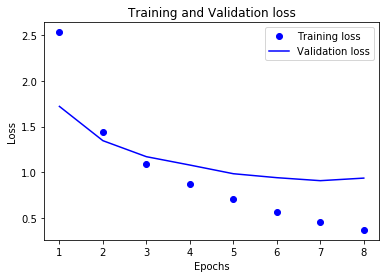

In [68]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


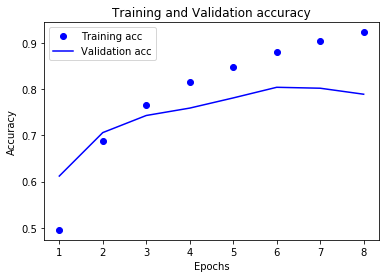

In [69]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [71]:
results = model.evaluate(x_test,one_hot_test_labels)

  32/2246 [..............................] - ETA: 0s

 320/2246 [===>..........................] - ETA: 0s

 576/2246 [======>.......................] - ETA: 0s

 896/2246 [==========>...................] - ETA: 0s

1248/2246 [===============>..............] - ETA: 0s

1536/2246 [===================>..........] - ETA: 0s

1792/2246 [======================>.......] - ETA: 0s

2016/2246 [=========================>....] - ETA: 0s

2246/2246 [==============================] - 0s 186us/step


In [72]:
results

[0.9956972887764418, 0.7778272484947504]

In [73]:
predictions = model.predict(x_test)

In [74]:
predictions[0].shape

(46,)

In [75]:
np.sum(predictions[0])

1.0000001

In [76]:
np.argmax(predictions[0])

3